<a href="https://colab.research.google.com/github/D1N3SH-DEV/DCOD3_titanic/blob/main/DCOD3_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset Project

![Titanic](https://i.imgur.com/NcCz6we.jpeg)

## Introduction
The Titanic dataset is a well-known dataset used in data science and machine learning competitions.

## Configuring Google Drive for data avalability.

In [1]:
# Step 1: Import the drive module from google.colab
from google.colab import drive

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Change directory to access your files (optional)
# You can change 'My Drive' to the specific folder you want to access
%cd /content/drive/My Drive/titanic

# Step 4: List files in the current directory (optional)
!ls

Mounted at /content/drive
/content/drive/My Drive/titanic
gender_submission.csv  test.csv  train.csv


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading Data

In [30]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Understanding

In [26]:
print(train_data.info())
print(train_data.describe())
print(train_data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

<Axes: >

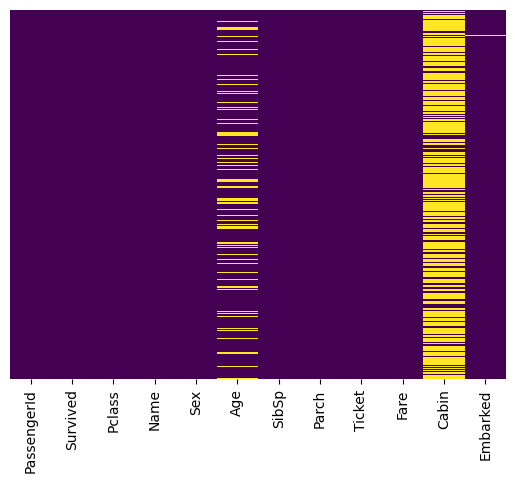

In [7]:
sns.heatmap(t_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## Handling Missing Values

In [31]:
# Filling age values with median
train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
#Filling Embarked values with the most common value
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)
# Removing the Cabin column for high null values for now
train_data.drop('Cabin',axis=1,inplace=True)
print(train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


<ipython-input-31-c0bda4c7e21f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(),inplace=True)
<ipython-input-31-c0bda4c7e21f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

## Feature Engineering
Creating new features that may help improve your model's performance

### Key Features:
- **PassengerId**: Unique identifier for each passenger.
- **Survived**: Survival status (0 or 1).
- **Pclass**: Ticket class (1st, 2nd, or 3rd).
- **Name**: Name of the passenger.
- **Sex**: Gender of the passenger.
- **Age**: Age in years.
- **SibSp**: Number of siblings/spouses aboard.
- **Parch**: Number of parents/children aboard.
- **Ticket**: Ticket number.
- **Fare**: Fare paid by the passenger.
- **Cabin**: Cabin number (deleted column)
- **Embarked**: Port of embarkation(C = Cherbourg; Q = Queenstown; S = Southampton).


In [32]:
# Creating a new feature for family size
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data[['FamilySize', 'SibSp', 'Parch']].head()

,FamilySize,SibSp,Parch
0,2,1,0
1,2,1,0
2,1,0,0
3,2,1,0
4,1,0,0


## Converting categorical variables into numerical formats using one-hot encoding.

In [33]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], drop_first=True)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,FamilySize,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,False,True


# Data Visualization

## Age Distribution

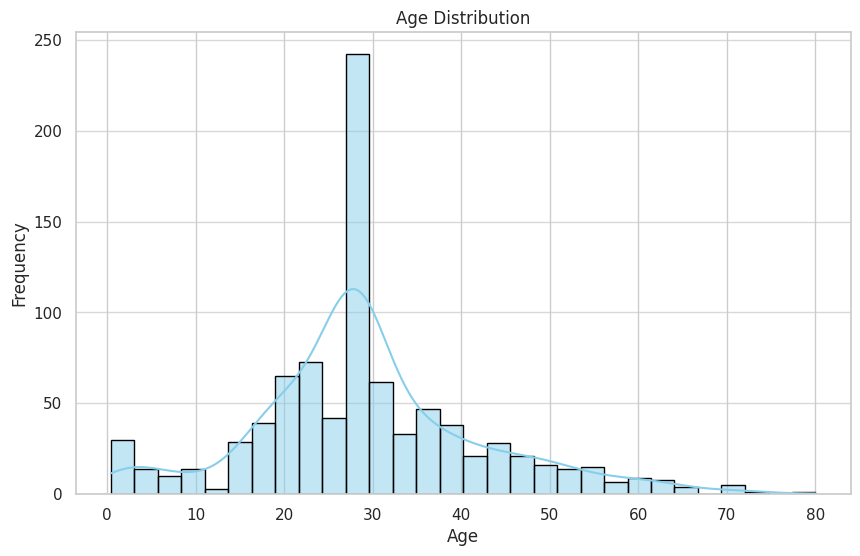

In [34]:
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

## Visualizing Survival Rates by Gender

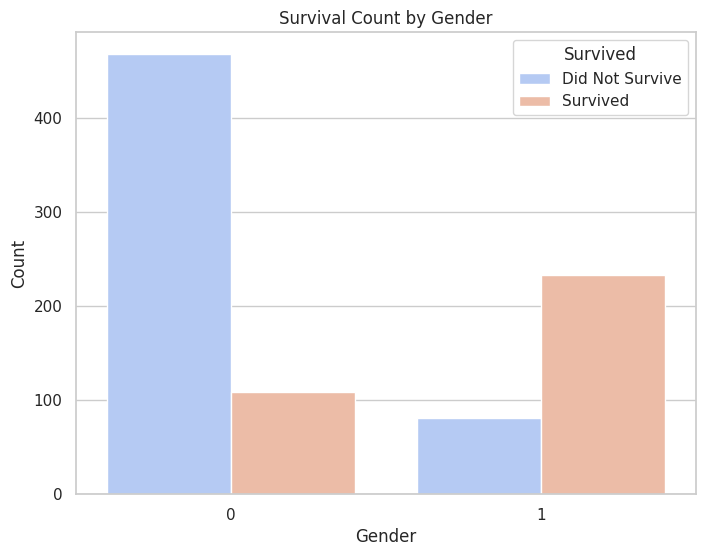

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Sex', hue='Survived', palette='coolwarm')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Did Not Survive', 'Survived'])
plt.show()

## Survival Rates by Passenger Class

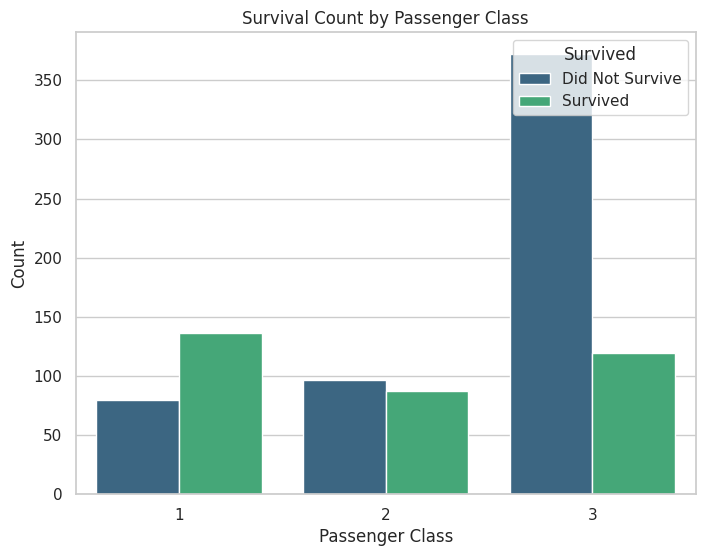

In [37]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train_data, x='Pclass', hue='Survived', palette='viridis')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['Did Not Survive', 'Survived'])
plt.show()

## Survival Rates by Age and Gender

<function matplotlib.pyplot.show(close=None, block=None)>

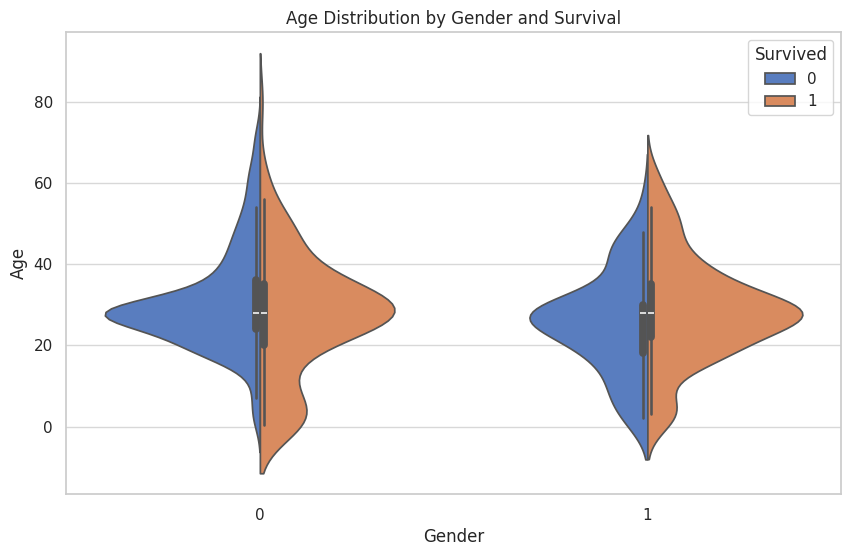

In [41]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=train_data, x='Sex', y='Age', hue='Survived', split=True, palette='muted')
plt.title('Age Distribution by Gender and Survival')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.grid(axis='y', alpha=0.75)
plt.show

## Correlation
### Understanding correlations between numerical features can help identify which features might be useful for modeling.

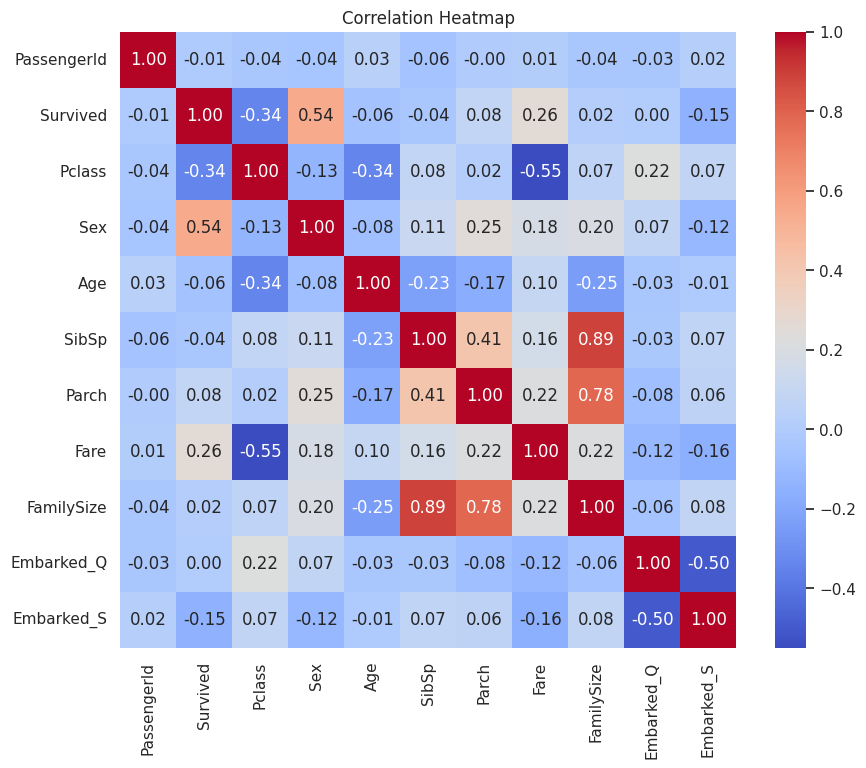

In [43]:
correlation_matrix=train_data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

## Model Selection

### Prepare the Data for Modeling
Before training any models, we need to ensure that our data is properly formatted and that we have separated our features from the target variable.

In [45]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Embarked_Q', 'Embarked_S']
target = 'Survived'
X = train_data[features]
y = train_data[target]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,2,False,True
1,1,1,38.0,1,0,71.2833,2,False,False
2,3,1,26.0,0,0,7.9250,1,False,True
3,1,1,35.0,1,0,53.1000,2,False,True
4,3,0,35.0,0,0,8.0500,1,False,True


## Splitting the data into training and validation sets.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training set shape: {X_train.shape}, Validation set shape: {X_val.shape}')

Training set shape: (712, 9), Validation set shape: (179, 9)


## Training a Baseline Model using Logostic Regression.

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_val)

accuracy_logreg=accuracy_score(y_val, y_pred)
print(f'Accuracy: {accuracy_logreg:.2f}')
print(classification_report(y_val, y_pred))

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Training a decision tree classifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_val)

accuracy_dtree=accuracy_score(y_val, y_pred_dtree)
print(f'Accuracy: {accuracy_dtree:.2f}')
print(classification_report(y_val, y_pred_dtree))

Accuracy: 0.79
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       105
           1       0.74      0.76      0.75        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



## Training a Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_val)

accuracy_rf=accuracy_score(y_val, y_pred_rf)
print(f'Accuracy: {accuracy_rf:.2f}')
print(classification_report(y_val, y_pred_rf))

Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



## Hyperparameter Tuning

Hyperparameters are parameters that are not learned from the data but are set before the learning process begins. For example:
- Logistic Regression: Regularization strength (C).
- Decision Tree: Maximum depth, minimum samples per leaf.
- Random Forest: Number of trees (n_estimators), maximum depth, etc.

## Using Grid Search for Hyperparamet Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

parma_grid_rf = {'n_estimators': [50,100,200],
                 'max_depth': [None, 10,20,30],
                 'min_samples_split': [2,5,10]}

rf_model = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=parma_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print(f'Best Parameters for Random Forest: {best_params_rf}')
print(f'Best Cross-Validation Score: {best_score_rf:.2f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score: 0.83


## Hyperparameter Tuning for Decision Tree

In [61]:
param_grid_dtree = {'max_depth': [None,10,15],
                    'min_samples_split': [2,5,10]}

dtree_model = DecisionTreeClassifier(random_state=42)

grid_search_dtree = GridSearchCV(estimator=dtree_model, param_grid=param_grid_dtree, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_dtree.fit(X_train, y_train)

best_params_dtree = grid_search_dtree.best_params_
best_score_dtree = grid_search_dtree.best_score_

print(f'Best Parameters for Decision Tree: {best_params_dtree}')
print(f'Best Cross-Validation Score: {best_score_dtree:.2f}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best Cross-Validation Score: 0.79


## Evaluating the best model

In [62]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_val)
accuracy_best_rf = accuracy_score(y_val, y_pred_best_rf)
print(f'Best Random Forest Validation Accuracy: {accuracy_best_rf:.2f}')

best_dtree_model = grid_search_dtree.best_estimator_
y_pred_best_dtree = best_dtree_model.predict(X_val)
accuracy_best_dtree = accuracy_score(y_val, y_pred_best_dtree)
print(f'Best Decision Tree Validation Accuracy: {accuracy_best_dtree:.2f}')

Best Random Forest Validation Accuracy: 0.85
Best Decision Tree Validation Accuracy: 0.84


## Final Model Evaluation
### Preparing the Test Data

In [63]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

test_data=pd.get_dummies(test_data,columns=['Embarked'],drop_first=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

X_test=test_data[features]

<ipython-input-63-9f58e1e60663>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
<ipython-input-63-9f58e1e60663>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

#Making Prediction with the Best Model

In [64]:
y_test_pred=best_rf_model.predict(X_test)
print(y_test_pred[:10])

[0 0 0 0 0 0 1 0 1 0]


# Preparing Submission File

In [66]:
submission = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': y_test_pred})
submission.to_csv('/content/drive/My Drive/titanic/titanic_submission.csv', index=False)

In [71]:
survival_counts = submission['Survived'].value_counts()
print(survival_counts)

Survived
0    275
1    143
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

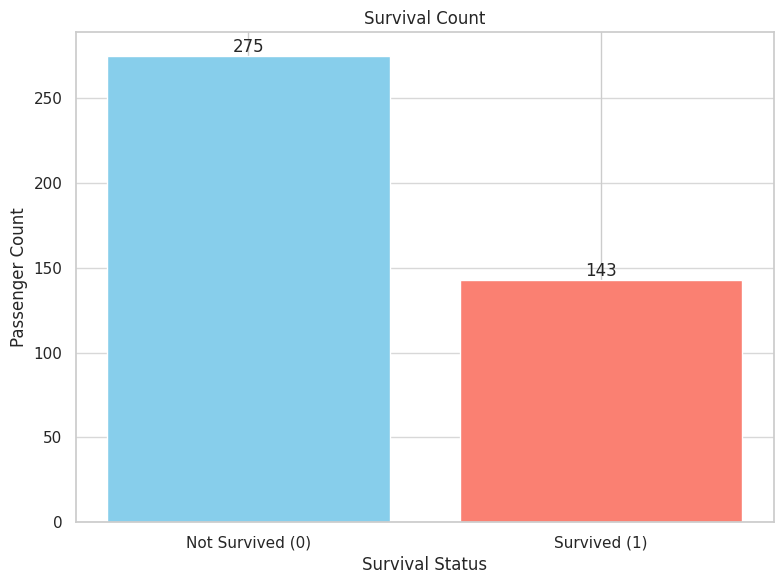

In [74]:
plt.figure(figsize=(8, 6))
bars = plt.bar(survival_counts.index, survival_counts.values, color=['skyblue', 'salmon'])
plt.title('Survival Count')
plt.xlabel('Survival Status')
plt.xticks(ticks=[0, 1], labels=['Not Survived (0)', 'Survived (1)'], rotation=0)
plt.ylabel('Passenger Count')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show